# 1. Filter

Definition: Form a new image whose pixels are a combination of the original pixels.

–	To get useful information from images (extract edges or contours (to understand shape))

–	To enhance the image (to blur to remove noise, to sharpen to “enhance image”)

# 2. Mean Filter

Definition: Replace pixel by mean of neighborhood.

General expression:
$$
f(m,n)=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f(m+i,n+j)
$$

$$
w=\frac{1}{(2k+1)^2}
\begin{bmatrix}
1&1&\cdots&1\\
1&1&\cdots&1\\
\vdots&\vdots&\ddots&1\\
1&1&\cdots&1\\
\end{bmatrix},aka.w(i,j)=\frac{1}{(2k+1)^2}
$$


Choose the kernel:

$$
w=\frac{1}{9}
\begin{bmatrix}
1&1&1\\
1&1&1\\
1&1&1\\
\end{bmatrix}
$$

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)

<module 'lib.utils' from '..\\lib\\utils.py'>

Orginal Image:

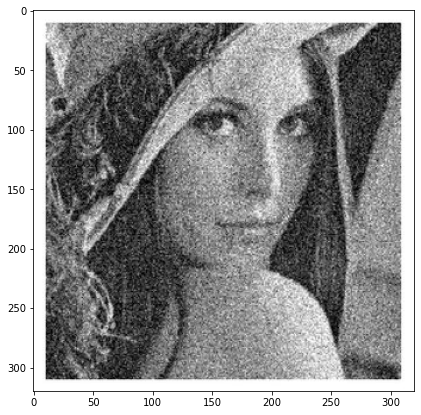

In [2]:
img = cv2.imread('img/example_01.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(7,7))
utils.show_img(img)

Mean-filter the image (without considering the boundary):

In [3]:
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

Text(0.5, 1.0, 'after mean filter size=9')

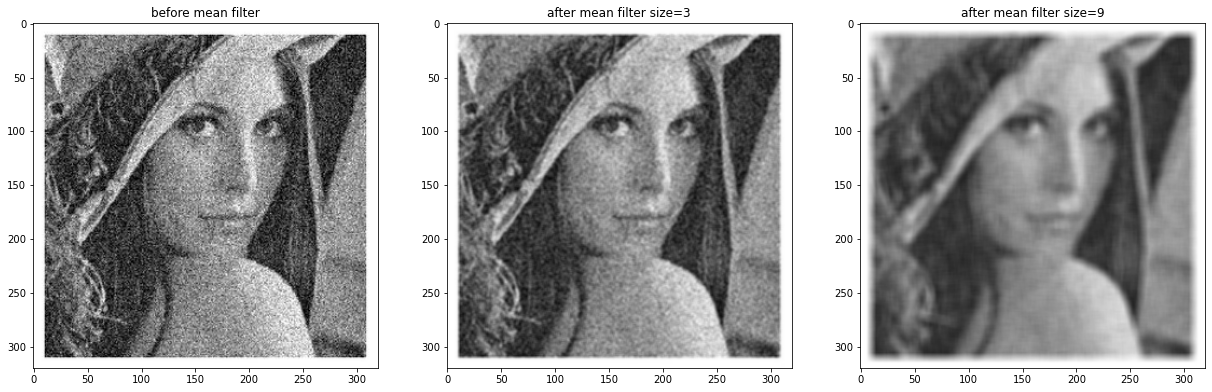

In [4]:
img_mean_filtered_3 = image_process.mean_filter(img, 3)
img_mean_filtered_9 = image_process.mean_filter(img, 9)

plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
utils.show_img(img)
plt.title('before mean filter')

plt.subplot(1,3,2)
utils.show_img(img_mean_filtered_3)
plt.title('after mean filter size=3')

plt.subplot(1,3,3)
utils.show_img(img_mean_filtered_9)
plt.title('after mean filter size=9')

# 3 Sharpening filter

\begin{equation}
\begin{aligned}
f_{sharp}&=f-\alpha(f-f_{blur})\\
    &=(1+\alpha)f-\alpha f_{blur}\\
    &=(1+\alpha)(w\ast f)-\alpha(v\ast f)\\
    &=((1+\alpha)w-\alpha v)\ast f
\end{aligned}
\end{equation}




Text(0.5, 1.0, 'after sharpening filter size=9 alpha=0.5')

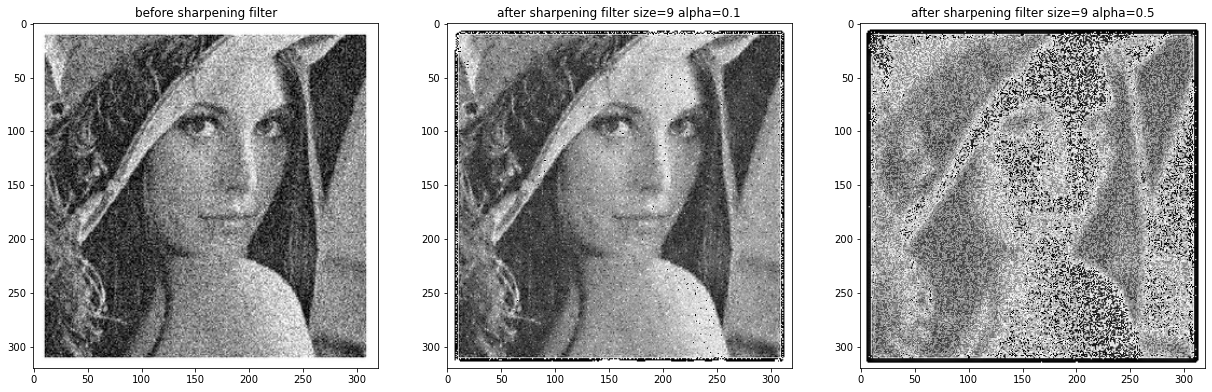

In [13]:
img_sharpening_filtered_9_1 = image_process.sharpening_filter(img, 9, 0.1)
img_sharpening_filtered_9_2 = image_process.sharpening_filter(img, 9, 0.5)

plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
utils.show_img(img)
plt.title('before sharpening filter')

plt.subplot(1,3,2)
utils.show_img(img_sharpening_filtered_9_1)
plt.title('after sharpening filter size=9 alpha=0.1')

plt.subplot(1,3,3)
utils.show_img(img_sharpening_filtered_9_2)
plt.title('after sharpening filter size=9 alpha=0.5')

# 4 Non-linear filters: Thresholding

\begin{equation}
g(m,n)=
\left\{
             \begin{array}{lr}
             255 & f(m,n)>A \\
             0 & o.w.\\
             \end{array}
\right.
\end{equation}

Text(0.5, 1.0, 'after thresholding filter A=180')

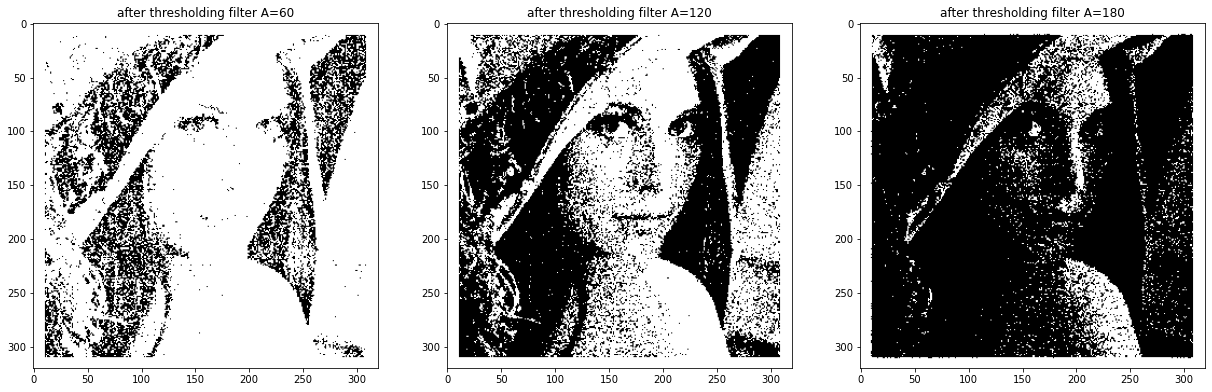

In [14]:
img_thresholding_filtered_1 = image_process.thresholding_filter(img, 60)
img_thresholding_filtered_2 = image_process.thresholding_filter(img, 120)
img_thresholding_filtered_3 = image_process.thresholding_filter(img, 180)

plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
utils.show_img(img_thresholding_filtered_1)
plt.title('after thresholding filter A=60')

plt.subplot(1,3,2)
utils.show_img(img_thresholding_filtered_2)
plt.title('after thresholding filter A=120')

plt.subplot(1,3,3)
utils.show_img(img_thresholding_filtered_3)
plt.title('after thresholding filter A=180')

# 5 Non-Linear Filters: Median Filter

Basic idea: Replace each pixel by the median of its neighbours.

Properties:

1. Doesn't introduce new pixel values

2. Remove spikes, good for impulse, salt&pepper noise

3. Non-linear

Text(0.5, 1.0, 'after median filter size=9 row-200')

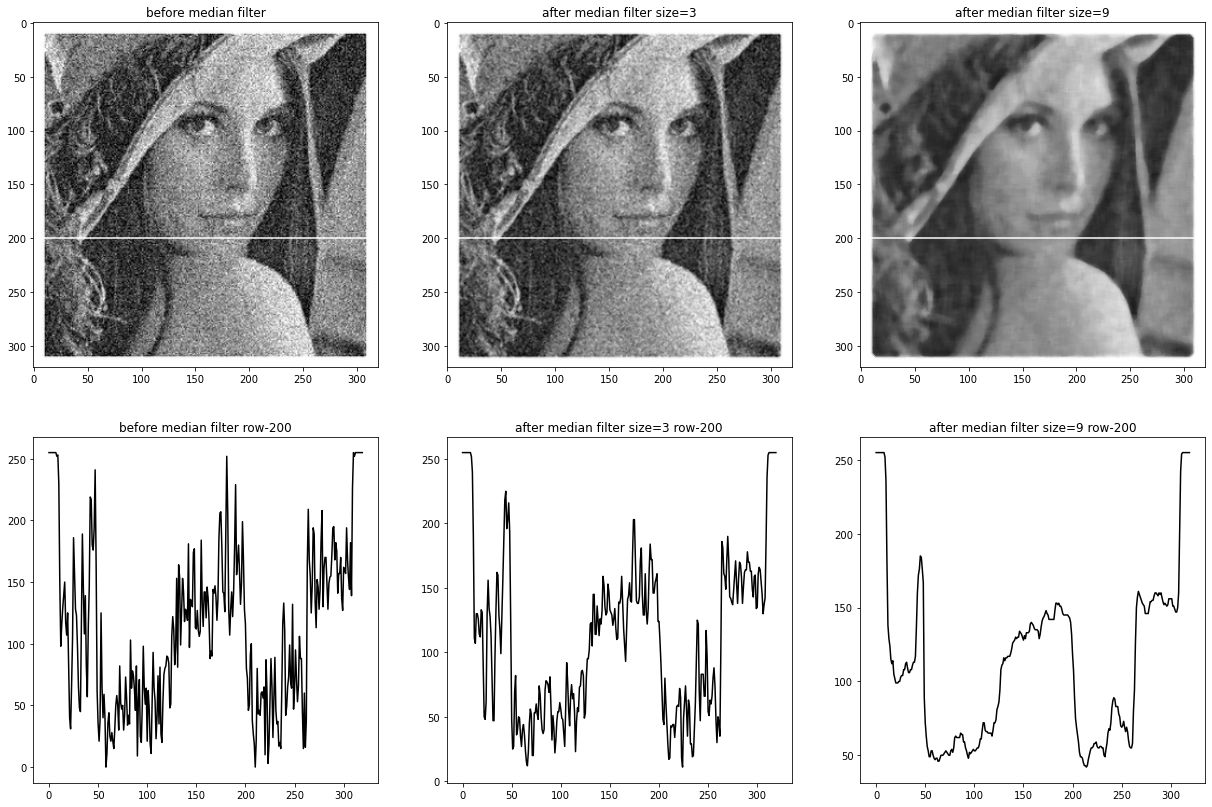

In [15]:
img_median_filtered_3 = image_process.median_filter(img, 3)
img_median_filtered_9 = image_process.median_filter(img, 9)

plt.figure(figsize=(21,14))

plt.subplot(2,3,1)
utils.show_img(img)
plt.plot([200 for i in range(0, img.shape[1])], 'w')
plt.title('before median filter')
plt.subplot(2,3,4)
plt.plot(img[200],'k')
plt.title('before median filter row-200')

plt.subplot(2,3,2)
utils.show_img(img_median_filtered_3)
plt.plot([200 for i in range(0, img.shape[1])], 'w')
plt.title('after median filter size=3')
plt.subplot(2,3,5)
plt.plot(img_median_filtered_3[200],'k')
plt.title('after median filter size=3 row-200')

plt.subplot(2,3,3)
utils.show_img(img_median_filtered_9)
plt.plot([200 for i in range(0, img.shape[1])], 'w')
plt.title('after median filter size=9')
plt.subplot(2,3,6)
plt.plot(img_median_filtered_9[200],'k')
plt.title('after median filter size=9 row-200')